### Load and Split Data
Load a CSV file and split Data and labels from data.

Next split train and test data using sklearn train_test_split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import itertools
diab = pd.read_csv("diabetes.csv")

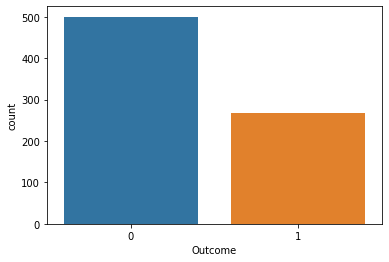

In [2]:
sns.countplot(x='Outcome',data=diab)
plt.show()

### Brief Analysis of Data

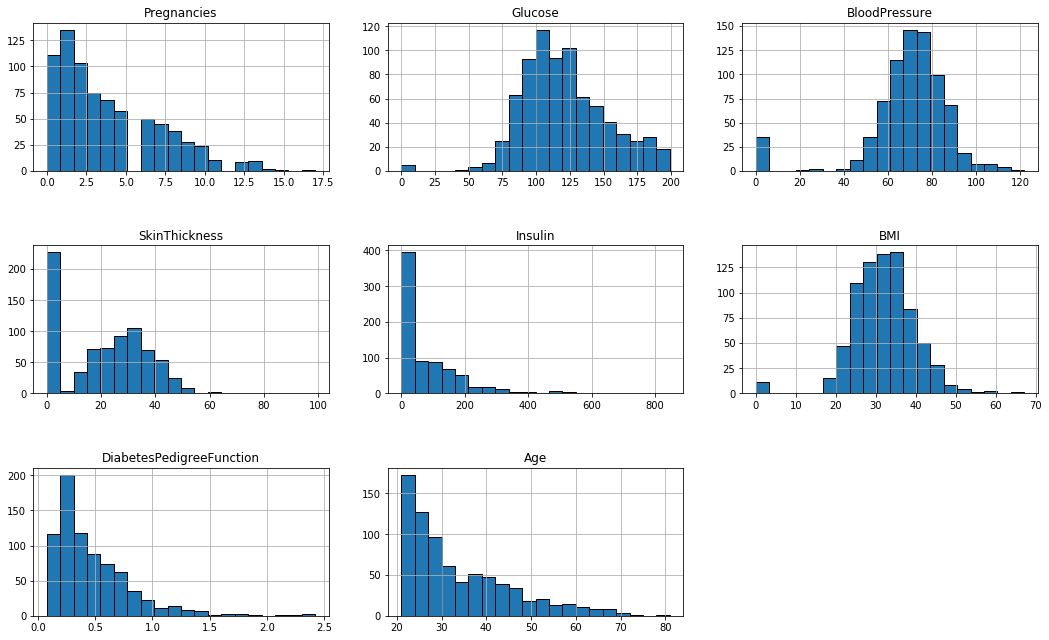

In [3]:
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis of Diabetic Cases

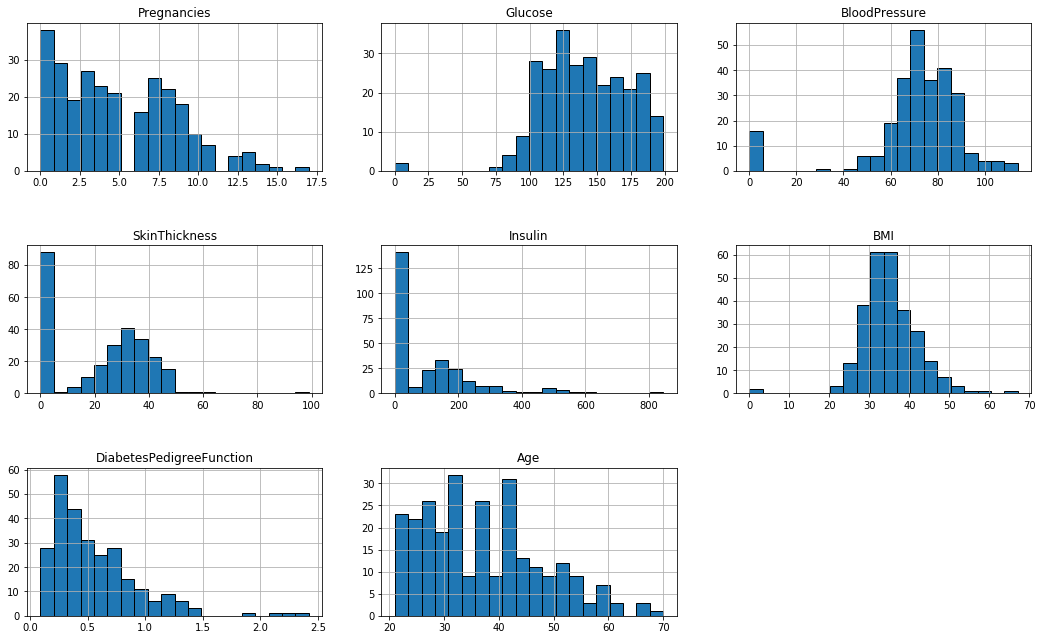

In [4]:
diab1=diab[diab['Outcome']==1]
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [5]:
X = diab.iloc[:, 1: -1]
y = diab.iloc[:, -1:]
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [6]:
X_train = np.asarray(X)
y_train = np.asarray(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Selection using Random Forest
Here we will apply feature selection using random forest classifier.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
New_Train_features = model.transform(X_train)
New_Test_features = model.transform(X_test)
print("Old Shape:", X_train.shape)
print("New Shape", New_Train_features.shape)

Old Shape: (576, 7)
New Shape (576, 4)


In [9]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout

from keras import backend as K
model = Sequential()
model.add(Dense(256, activation="relu", input_shape = (X_train.shape[1],))) # Hidden Layer 1 that receives the Input from the Input Layer

model.add(Dense(512, activation="relu")) # Hidden Layer 2

model.add(Dense(256, activation="relu")) # Hidden Layer 2


model.add(Dense(128, activation="relu")) # Hidden Layer 3
model.add(Dense(128, activation="relu")) # Hidden Layer 3

model.add(Dense(64, activation="relu")) # Hidden Layer 4
model.add(Dense(64, activation="relu")) # Hidden Layer 4

model.add(Dense(1, activation="sigmoid")) # Outout Layer

model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dens

In [10]:
 model.compile(loss="binary_crossentropy", optimizer="adam",
	metrics=["accuracy"])

In [11]:
Nepochs = 300
H = model.fit(X_train, y_train, epochs=Nepochs)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
576/576 [==============================] - 2s 3ms/step - loss: 0.7975 - acc: 0.5920
Epoch 2/300
576/576 [==============================] - 0s 458us/step - loss: 0.6937 - acc: 0.5833
Epoch 3/300
576/576 [==============================] - 0s 430us/step - loss: 0.6710 - acc: 0.6354
Epoch 4/300
576/576 [==============================] - 0s 403us/step - loss: 0.6700 - acc: 0.6285
Epoch 5/300
576/576 [==============================] - 0s 472us/step - loss: 0.6676 - acc: 0.6528 0s - loss: 0.6659 - acc: 0.6
Epoch 6/300
576/576 [==============================] - 0s 472us/step - loss: 0.6107 - acc: 0.6753
Epoch 7/300
576/576 [==============================] - 0s 444us/step - loss: 0.6030 - acc: 0.6858
Epoch 8/300
576/576 [==============================] - 0s 486us/step - loss: 0.5857 - acc: 0.7066
Epoch 9/300
576/576 [==============================] - 0s 423us/step - loss: 0.6024 - acc: 0.6701
Epoch 10/300
576/576 [=====================

576/576 [==============================] - 0s 340us/step - loss: 0.4030 - acc: 0.8229
Epoch 81/300
576/576 [==============================] - 0s 354us/step - loss: 0.3828 - acc: 0.8177
Epoch 82/300
576/576 [==============================] - 0s 340us/step - loss: 0.3883 - acc: 0.8108
Epoch 83/300
576/576 [==============================] - 0s 375us/step - loss: 0.4275 - acc: 0.7778
Epoch 84/300
576/576 [==============================] - 0s 403us/step - loss: 0.4016 - acc: 0.8073
Epoch 85/300
576/576 [==============================] - 0s 403us/step - loss: 0.4087 - acc: 0.7969
Epoch 86/300
576/576 [==============================] - 0s 375us/step - loss: 0.4035 - acc: 0.7917
Epoch 87/300
576/576 [==============================] - 0s 375us/step - loss: 0.3573 - acc: 0.8351
Epoch 88/300
576/576 [==============================] - 0s 375us/step - loss: 0.3967 - acc: 0.8264
Epoch 89/300
576/576 [==============================] - 0s 389us/step - loss: 0.4333 - acc: 0.7847
Epoch 90/300
576/576 [=

Epoch 162/300
576/576 [==============================] - 0s 304us/step - loss: 0.2283 - acc: 0.9149
Epoch 163/300
576/576 [==============================] - 0s 314us/step - loss: 0.2417 - acc: 0.8906
Epoch 164/300
576/576 [==============================] - 0s 285us/step - loss: 0.2361 - acc: 0.8941
Epoch 165/300
576/576 [==============================] - 0s 283us/step - loss: 0.2319 - acc: 0.8906
Epoch 166/300
576/576 [==============================] - 0s 288us/step - loss: 0.2236 - acc: 0.8993
Epoch 167/300
576/576 [==============================] - 0s 328us/step - loss: 0.2342 - acc: 0.8889
Epoch 168/300
576/576 [==============================] - 0s 305us/step - loss: 0.2297 - acc: 0.8993
Epoch 169/300
576/576 [==============================] - 0s 302us/step - loss: 0.1986 - acc: 0.9080
Epoch 170/300
576/576 [==============================] - 0s 307us/step - loss: 0.1962 - acc: 0.9253
Epoch 171/300
576/576 [==============================] - 0s 305us/step - loss: 0.2242 - acc: 0.9045


576/576 [==============================] - 0s 383us/step - loss: 0.1319 - acc: 0.9479
Epoch 244/300
576/576 [==============================] - 0s 375us/step - loss: 0.1424 - acc: 0.9375
Epoch 245/300
576/576 [==============================] - 0s 409us/step - loss: 0.1308 - acc: 0.9427
Epoch 246/300
576/576 [==============================] - 0s 394us/step - loss: 0.1761 - acc: 0.9427
Epoch 247/300
576/576 [==============================] - 0s 389us/step - loss: 0.2429 - acc: 0.8976
Epoch 248/300
576/576 [==============================] - 0s 368us/step - loss: 0.1865 - acc: 0.9149
Epoch 249/300
576/576 [==============================] - 0s 404us/step - loss: 0.1373 - acc: 0.9427
Epoch 250/300
576/576 [==============================] - 0s 411us/step - loss: 0.1013 - acc: 0.9601
Epoch 251/300
576/576 [==============================] - 0s 387us/step - loss: 0.0875 - acc: 0.9531
Epoch 252/300
576/576 [==============================] - 0s 323us/step - loss: 0.1029 - acc: 0.9566
Epoch 253/300


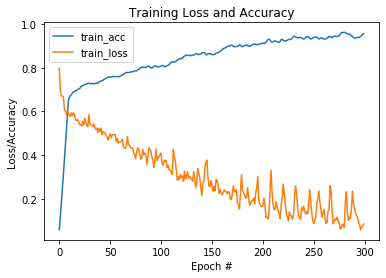

In [12]:
import matplotlib.pyplot as plt

from scipy.signal import lfilter
def normalizeCurve(data, n = 8):
    n = 10  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    yy = lfilter(b,a,data)
    return yy
    
plt.plot([i for i in range(Nepochs)], normalizeCurve(H.history["acc"]), label="train_acc")
plt.plot([i for i in range(Nepochs)], H.history["loss"], label="train_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()